# <center>Bank Marketing (Campaign)</center>

Group Name: __Bank Marketing DS 01__

Specialization: __Data Science__

Team Members: 
1. __Ines Perko__
2. __Suvansh Vaid__
3. __Zeynep Basask Elen__

# Model building and testing

In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [47]:
# Reading data
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
from sklearn.preprocessing import LabelEncoder

#encoding target label
LE=LabelEncoder()

data['y']=LE.fit_transform(data.y.values)

#encoding categorical features
data=pd.get_dummies(data)

In [50]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


## Preparing train-test data

In [51]:
X = data[[x for x in data.columns if x != 'y']]

y = data.y

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
feature_cols = set(list(X.columns)) - {'y'}

# Model Building 

In [54]:
def train_predict(model, x_test, y_test):

    # make predictions on test data
    predictions = model.predict(x_test)
    
    # build a confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=lr.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    
    # print classification report 
    print(classification_report(y_test, predictions)) 
    
    # Plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Bank marketing Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    print('AUC Score:',round(roc_auc_score(y_test, predictions),4))
    
    disp.plot()

## 1. Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.44      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

AUC Score: 0.7069


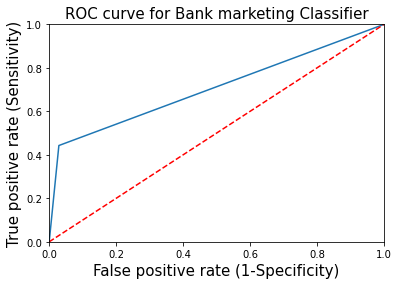

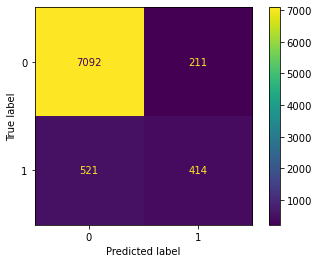

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# train the model on train set 
lr.fit(X_train, y_train) 

train_predict(lr, X_test, y_test)

## 2. Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

AUC Score: 0.7267


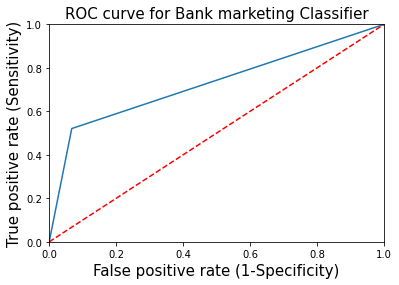

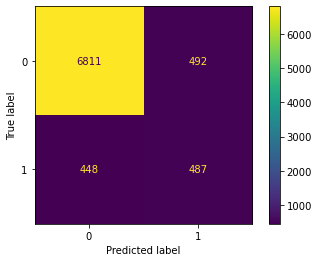

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

train_predict(clf, X_test, y_test)

In [57]:
from sklearn import tree

print(tree.export_text(clf))

|--- feature_9 <= 5087.65
|   |--- feature_1 <= 158.50
|   |   |--- feature_1 <= 62.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  62.50
|   |   |   |--- feature_3 <= 14.50
|   |   |   |   |--- feature_6 <= 93.56
|   |   |   |   |   |--- feature_56 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 0.72
|   |   |   |   |   |   |   |--- feature_5 <= -3.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  -3.20
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.71
|   |   |   |   |   |   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_33 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_37 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_8 >  0.71
|   |   | 

## 3. Random Forest Classifier (Bagging)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.65      0.46      0.54       935

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

AUC Score: 0.7149


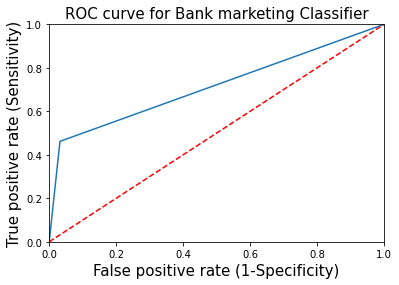

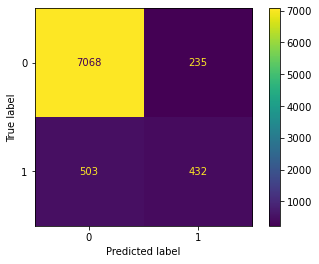

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)

rf = rf.fit(X_train, y_train)

train_predict(rf, X_test, y_test)

In [59]:
#Vizualizing important features
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

feature_imp

duration                2.738542e-01
euribor3m               9.124496e-02
age                     7.945116e-02
nr.employed             4.979264e-02
campaign                3.916636e-02
                            ...     
job_unknown             1.471375e-03
month_dec               7.472370e-04
marital_unknown         4.390628e-04
education_illiterate    2.207109e-04
default_yes             1.445731e-07
Length: 63, dtype: float64

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

## 4. Extreme Gradient Boosting Classifier (Boosting) 

[18:01:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.55      0.59       935

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238

AUC Score: 0.7547


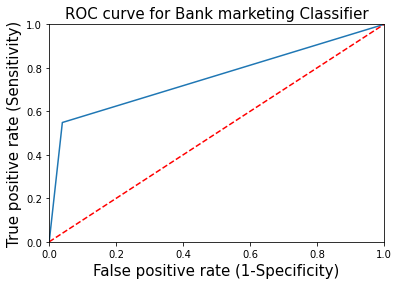

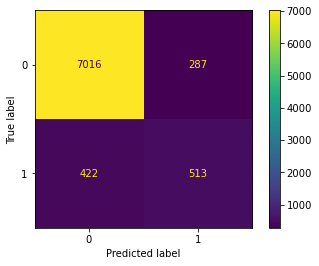

In [60]:
import xgboost as xg

xgb = xg.XGBClassifier(n_estimators=100, random_state=42)

xgb = xgb.fit(X_train, y_train)

train_predict(xgb, X_test, y_test)

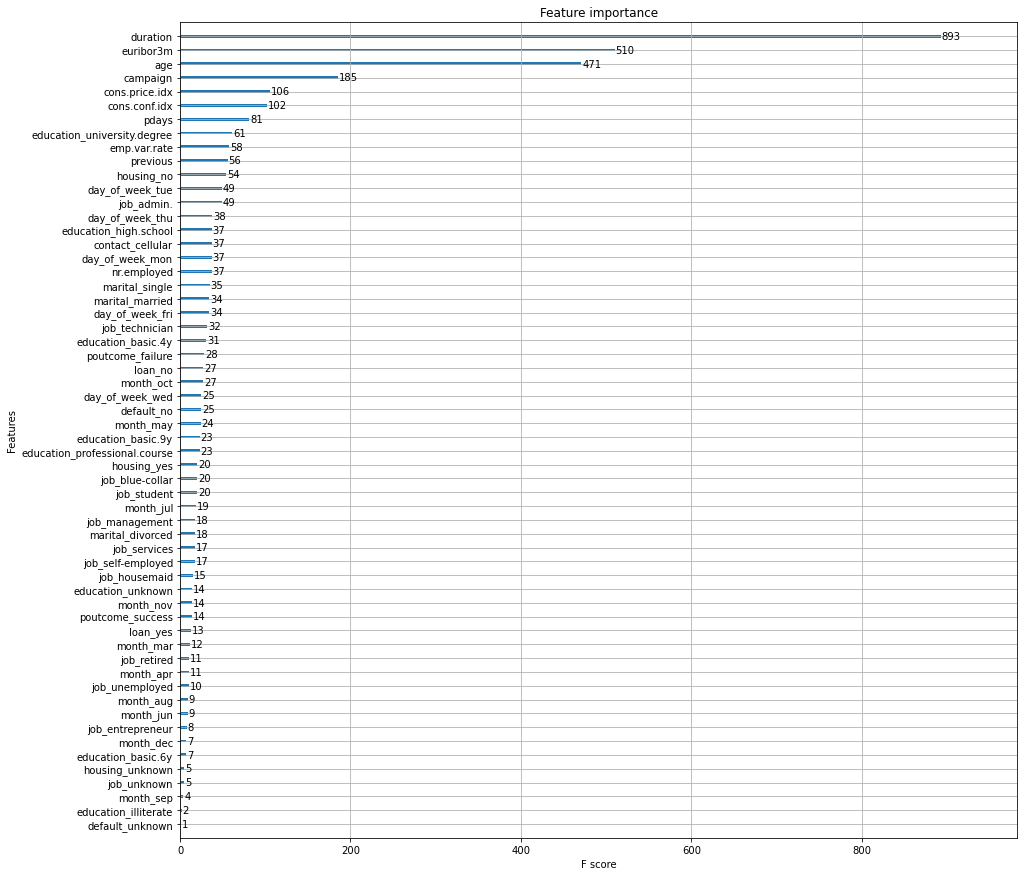

In [61]:
# Feature importance
plt.rcParams['figure.figsize'] = [15, 15]
xg.plot_importance(xgb)

In [62]:
plt.rcParams['figure.figsize'] = [8, 8]

# Solving for Load imbalance
# SMOTE Sampling and Under sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

# fit predictor and target variable 
x_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE()

# fit predictor and target variable 
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', y_train.shape)
print('SMOTE dataset shape', y_smote.shape)
print('Undersample dataset shape', y_rus.shape)

Original dataset shape (32950,)
SMOTE dataset shape (58490,)
Undersample dataset shape (7410,)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.61      0.50      0.55       935

    accuracy                           0.91      8238
   macro avg       0.78      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238

AUC Score: 0.732


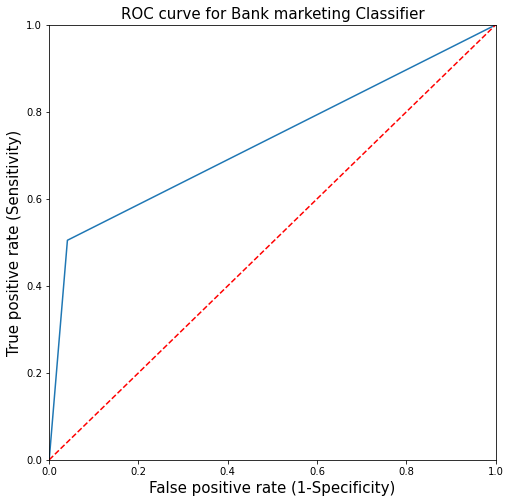

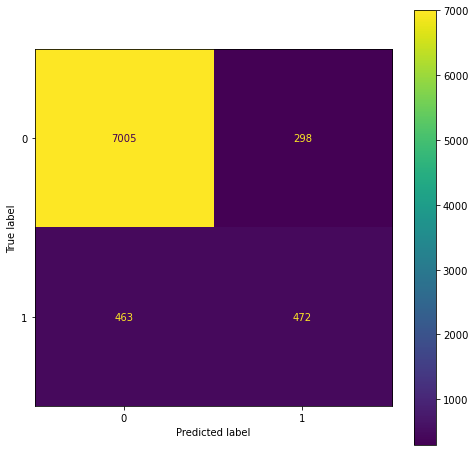

In [63]:
# Random Forest on SMOTE sampled data
rf = RandomForestClassifier(n_estimators=1000)

rf = rf.fit(x_smote, y_smote)

train_predict(rf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7303
           1       0.42      0.93      0.58       935

    accuracy                           0.85      8238
   macro avg       0.71      0.88      0.74      8238
weighted avg       0.93      0.85      0.87      8238

AUC Score: 0.8842


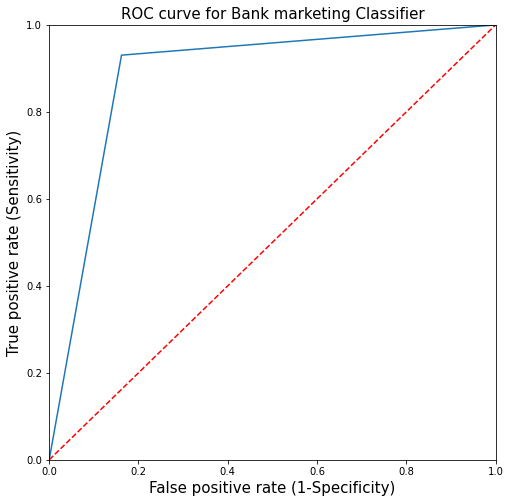

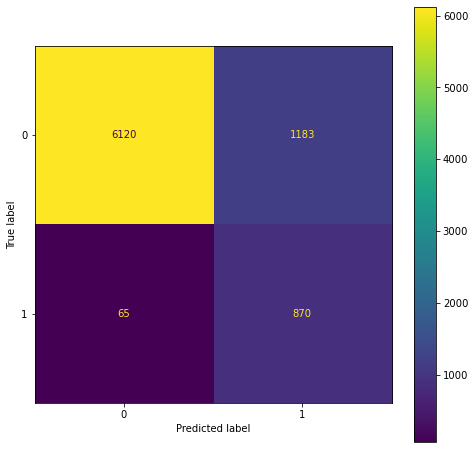

In [64]:
# Random Forest on Under Sampled data
rf = RandomForestClassifier(n_estimators=1000)

rf = rf.fit(x_rus, y_rus)

train_predict(rf, X_test, y_test)

# Model without `duration` and with `under sampled data`:

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7303
           1       0.29      0.63      0.40       935

    accuracy                           0.78      8238
   macro avg       0.62      0.72      0.63      8238
weighted avg       0.87      0.78      0.81      8238

AUC Score: 0.7173


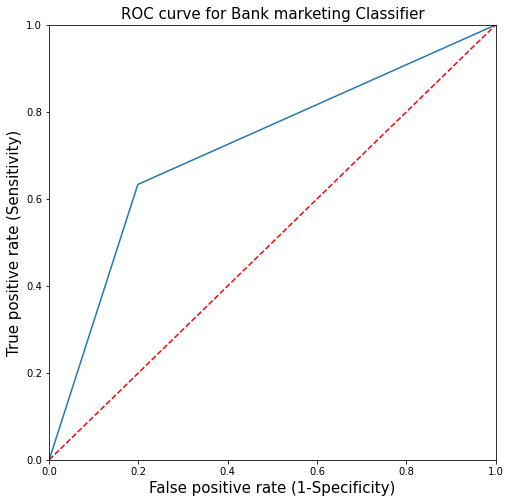

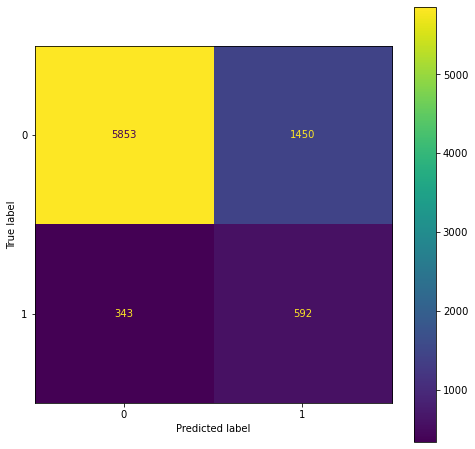

In [66]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

data.drop(['duration'], axis = 1, inplace = True)

#encoding target label
LE=LabelEncoder()

data['y']=LE.fit_transform(data.y.values)

#encoding categorical features
data=pd.get_dummies(data)

X = data[[x for x in data.columns if x != 'y']]

y = data.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)

# fit predictor and target variable 
x_rus, y_rus = rus.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=1000)

rf = rf.fit(x_rus, y_rus)

train_predict(rf, X_test, y_test)

We see that the accuracy drops significantly when the `duration`  is not used. But, we presist the model (without duration) since it is more practical to the business. 
We also persist with an under sampled data for better results. 